# Final version (5 label)

### Import packages

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns; sns.set()

import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing


Load the normalized data set

In [2]:
patients = pd.read_csv('normalized_data.csv') #loading data
patients.shape

(918, 12)

In [3]:
patients.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,class
0,0.714286,1.0,0.000000,0.725,0.386401,1.0,1.0,0.633803,0.0,0.556818,1.0,0
1,0.795918,1.0,1.000000,0.800,0.474295,0.0,1.0,0.338028,1.0,0.465909,0.5,2
2,0.795918,1.0,1.000000,0.600,0.379768,0.0,1.0,0.485915,1.0,0.590909,0.5,1
3,0.183673,1.0,0.666667,0.650,0.414594,0.0,0.0,0.894366,0.0,0.693182,1.0,0
4,0.265306,0.0,0.333333,0.650,0.338308,0.0,1.0,0.788732,0.0,0.454545,0.0,0


##  Checking the data if it is balanced or not.

Count of data in the target variable AxesSubplot(0.125,0.125;0.775x0.755)


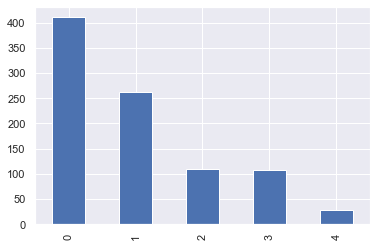

In [4]:
print("Count of data in the target variable",patients['class'].value_counts().head(10).plot.bar())


### Testing for correlation between all features in our dataset 

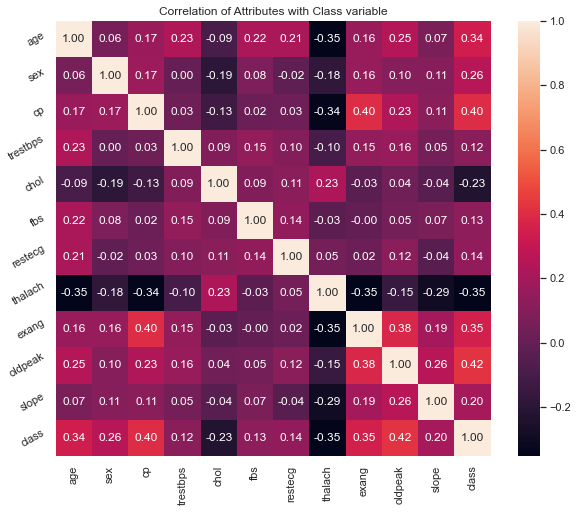

In [5]:
correlation= patients.corr()
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()


Split the class label and features into separate data frames

In [6]:
pt_features = patients.drop('class', axis=1)
pt_class = patients['class']

Split the full (normazlied) data set into train (70%) and test (30%) sets

In [7]:
train_features, test_features, train_label, test_label = train_test_split(pt_features, pt_class, test_size=0.3, random_state=0)

In [8]:
train_features.shape


(642, 11)

In [9]:
test_features.shape

(276, 11)

Run decision tree classifier and do k-fold cross validation with k=10 on the train data set with scoring as F1macro

In [10]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=20, criterion='entropy')
treescores = cross_val_score(clf, train_features, train_label, cv=10, scoring='f1_macro')

In [11]:
print(treescores)

[0.18865991 0.18831324 0.28517186 0.21758513 0.46281095 0.29468171
 0.26463659 0.2692596  0.43214286 0.36130566]


Run Random Forest with 10, 100 and 1000 trees

In [12]:
forest10 = RandomForestClassifier(n_estimators=10, max_depth=10, criterion='entropy', random_state=0)
forest100 = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='entropy',random_state=0)
forest1000 = RandomForestClassifier(n_estimators=1000, max_depth=10, criterion='entropy', random_state=0)

In [13]:
forestscores10 = cross_val_score(forest10, train_features, train_label, cv=10, scoring='f1_macro')
forestscores100 = cross_val_score(forest100, train_features, train_label, cv=10, scoring='f1_macro')
forestscores1000 = cross_val_score(forest1000, train_features, train_label, cv=10, scoring='f1_macro')

In [14]:
print(forestscores100)

[0.25285104 0.30500611 0.36149918 0.29887446 0.35955379 0.25374474
 0.43734219 0.35951923 0.44433796 0.33543199]


### Apply SVM

In [15]:
svmlinear = SVC(kernel='linear', random_state=0)
svmpoly = SVC(kernel='poly', gamma='auto',random_state=0)
svmrbf = SVC(kernel='rbf', gamma='auto',random_state=0)

In [16]:
svmscoreslinear = cross_val_score(svmlinear, train_features, train_label, cv=10, scoring='f1_macro')
svmscorespoly = cross_val_score(svmpoly, train_features, train_label, cv=10, scoring='f1_macro')
svmscoresrbf = cross_val_score(svmrbf, train_features, train_label, cv=10, scoring='f1_macro')

In [17]:
print(svmscoreslinear)
print(svmscorespoly)
print(svmscoresrbf)

[0.19742547 0.21693767 0.24973262 0.26470588 0.25184679 0.23769841
 0.26462766 0.23666211 0.24016282 0.2248974 ]
[0.18542569 0.2190618  0.23991755 0.23040936 0.25868782 0.1887218
 0.26708075 0.23215573 0.25405405 0.23243243]
[0.18036984 0.21284271 0.25294118 0.26506355 0.26211268 0.21904762
 0.26424242 0.24596273 0.23647887 0.21521127]


Compute mean

In [18]:
print("F1 score of decision tree: %0.2f (+/- %0.2f)" % (treescores.mean(), treescores.std() * 1.96))

F1 score of decision tree: 0.30 (+/- 0.18)


In [19]:
print("F1 score of forest with 10 trees: %0.2f (+/- %0.2f)" % (forestscores10.mean(), forestscores10.std() * 1.96))


F1 score of forest with 10 trees: 0.34 (+/- 0.16)


In [20]:
print("F1 score of forest with 100 trees: %0.2f (+/- %0.2f)" % (forestscores100.mean(), forestscores100.std() * 1.96))


F1 score of forest with 100 trees: 0.34 (+/- 0.12)


In [21]:
print("F1 score of forest with 1000 trees: %0.2f (+/- %0.2f)" % (forestscores1000.mean(), forestscores1000.std() * 1.96))


F1 score of forest with 1000 trees: 0.32 (+/- 0.08)


In [22]:
print("F1 score of Linear SVM: %0.2f (+/- %0.2f)" % (svmscoreslinear.mean(), svmscoreslinear.std() * 1.96))


F1 score of Linear SVM: 0.24 (+/- 0.04)


In [23]:
print("F1 score of Poly SVM: %0.2f (+/- %0.2f)" % (svmscorespoly.mean(), svmscorespoly.std() * 1.96))


F1 score of Poly SVM: 0.23 (+/- 0.05)


In [24]:
print("F1 score of RBF SVM: %0.2f (+/- %0.2f)" % (svmscoresrbf.mean(), svmscoresrbf.std() * 1.96))

F1 score of RBF SVM: 0.24 (+/- 0.05)


Train best performing model on the whole train data set

In [25]:
best_forest = forest100.fit(train_features, train_label)

In [26]:
best_svm = svmrbf.fit(train_features, train_label)

Run the model on test data

In [27]:
ypred_best_forest = best_forest.predict(test_features)

In [28]:
ypred_best_svm = best_svm.predict(test_features)

Prepare report for best model of each type - Forest

In [29]:
print(metrics.classification_report(test_label, ypred_best_forest))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75       117
           1       0.46      0.51      0.48        83
           2       0.09      0.03      0.04        40
           3       0.36      0.36      0.36        28
           4       0.50      0.25      0.33         8

    accuracy                           0.55       276
   macro avg       0.42      0.39      0.39       276
weighted avg       0.49      0.55      0.51       276



In [30]:
print(round(metrics.accuracy_score(test_label,ypred_best_forest),ndigits=2))

0.55


In [31]:
print(round(metrics.precision_score(test_label,ypred_best_forest,average='weighted'),ndigits=2))

0.49


In [32]:
print(round(metrics.recall_score(test_label,ypred_best_forest,average='weighted'),ndigits=2))

0.55


In [33]:
print(round(metrics.f1_score(test_label,ypred_best_forest,average='weighted'),ndigits=2))

0.51


Binarize labels which is needed for multi class calculation of auc

In [34]:
labels = [0, 1, 2, 3, 4]
new_test_label= preprocessing.label_binarize(test_label, classes=labels)
new_ypred_best_forest= preprocessing.label_binarize(ypred_best_forest, classes=labels)
new_ypred_best_svm= preprocessing.label_binarize(ypred_best_svm,classes= labels)

In [35]:

print(round(metrics.roc_auc_score(new_test_label,new_ypred_best_forest,average='weighted',multi_class='ovo'),ndigits=2))

0.67


In [36]:
print(metrics.classification_report(test_label, ypred_best_svm))

              precision    recall  f1-score   support

           0       0.60      0.85      0.71       117
           1       0.47      0.63      0.54        83
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00         8

    accuracy                           0.55       276
   macro avg       0.22      0.30      0.25       276
weighted avg       0.40      0.55      0.46       276



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
print(round(metrics.accuracy_score(test_label,ypred_best_svm),ndigits=2))

0.55


In [38]:
print(round(metrics.precision_score(test_label,ypred_best_svm,average='weighted',),ndigits=2))

0.4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print(round(metrics.recall_score(test_label,ypred_best_svm,average='weighted'),ndigits=2))

0.55


In [40]:
print(round(metrics.f1_score(test_label,ypred_best_svm,average='weighted'),ndigits=2))

0.46


In [41]:
print(round(metrics.roc_auc_score(new_test_label,new_ypred_best_svm,average='weighted',multi_class='ovo'),ndigits=2))

0.64


##  Heavens part (KNN, 5 label)

In [42]:
patients.isnull().sum()
patients.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
class       0
dtype: int64

In [43]:
patients.dtypes ## to assure all values have correct datatype

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
class         int64
dtype: object

#### Visualizing the colums of the training dataset

In [44]:
cols = train_features.columns

#### Scaling the data before importing to KNN (Very necessary)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_features = scaler.fit_transform(train_features)

test_features = scaler.transform(test_features)

#### Change the scaled data in to dataframe

In [46]:
train_features = pd.DataFrame(train_features, columns=[cols])
test_features = pd.DataFrame(test_features, columns=[cols])

#### Visualizind the scalled data

In [47]:
train_features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,0.739356,0.528095,0.817827,-0.333494,0.532984,-0.371884,1.742382,0.106674,1.352107,1.840300,0.302320
1,1.268999,-1.893598,-0.280593,0.480030,2.048218,2.689009,1.742382,0.721407,-0.739586,-0.041475,-1.638577
2,-0.955503,0.528095,0.817827,-0.062319,0.066026,-0.371884,0.500862,-0.431216,-0.739586,-0.794186,0.302320
3,-0.955503,0.528095,-0.280593,-0.604669,0.228032,-0.371884,-0.740657,1.182456,-0.739586,-0.794186,-1.638577
4,0.103784,0.528095,-0.280593,-0.604669,0.332859,-0.371884,-0.740657,0.452461,1.352107,0.617146,0.302320


In [48]:
test_features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,0.209712,0.528095,0.817827,0.588499,0.247091,-0.371884,0.500862,0.414041,1.352107,1.558034,-1.638577
1,-0.531788,0.528095,0.817827,1.564728,0.628282,-0.371884,-0.740657,-1.353315,1.352107,0.146702,0.302320
2,-0.849574,0.528095,-2.477433,-1.147018,0.590163,-0.371884,-0.740657,-0.239112,-0.739586,0.334880,0.302320
3,1.692714,0.528095,0.817827,0.051574,0.828407,2.689009,0.500862,-0.027798,-0.739586,0.052614,0.302320
4,-0.214002,-1.893598,-0.280593,-0.604669,0.885586,-0.371884,1.742382,0.721407,-0.739586,-0.229653,-1.638577


### Creating KNN Model K=3

In [49]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(train_features, train_label)
knn_3_predicted = knn_3.predict(test_features)
knn_3_conf_matrix = confusion_matrix(test_label, knn_3_predicted)
knn_3_acc_score = accuracy_score(test_label, knn_3_predicted)
print("confussion matrix")
print(knn_3_conf_matrix)
print("-------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_3_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_label,knn_3_predicted))

confussion matrix
[[92 22  2  1  0]
 [29 43  3  8  0]
 [13 22  3  1  1]
 [11  6  8  2  1]
 [ 1  3  1  1  2]]
-------------------------------------------
Accuracy of K-NeighborsClassifier: 51.449275362318836 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.79      0.70       117
           1       0.45      0.52      0.48        83
           2       0.18      0.07      0.11        40
           3       0.15      0.07      0.10        28
           4       0.50      0.25      0.33         8

    accuracy                           0.51       276
   macro avg       0.38      0.34      0.34       276
weighted avg       0.46      0.51      0.48       276



### Creating KNN Model K=5

In [50]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(train_features, train_label)
knn_5_predicted = knn_5.predict(test_features)
knn_5_conf_matrix = confusion_matrix(test_label, knn_5_predicted)
knn_5_acc_score = accuracy_score(test_label, knn_5_predicted)
print("confussion matrix")
print(knn_5_conf_matrix)
print("-------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_5_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_label,knn_5_predicted))

confussion matrix
[[93 18  4  2  0]
 [24 41 11  7  0]
 [ 9 22  4  3  2]
 [ 7 11 10  0  0]
 [ 2  1  2  2  1]]
-------------------------------------------
Accuracy of K-NeighborsClassifier: 50.36231884057971 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       117
           1       0.44      0.49      0.47        83
           2       0.13      0.10      0.11        40
           3       0.00      0.00      0.00        28
           4       0.33      0.12      0.18         8

    accuracy                           0.50       276
   macro avg       0.32      0.30      0.30       276
weighted avg       0.45      0.50      0.47       276



### Creating KNN Model K=10

In [51]:
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(train_features, train_label)
knn_10_predicted = knn_10.predict(test_features)
knn_10_conf_matrix = confusion_matrix(test_label, knn_10_predicted)
knn_10_acc_score = accuracy_score(test_label, knn_10_predicted)
print("confussion matrix")
print(knn_10_conf_matrix)
print("-------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_10_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(test_label,knn_10_predicted))

confussion matrix
[[95 19  2  1  0]
 [23 45  8  7  0]
 [ 9 23  4  4  0]
 [ 6 11  9  1  1]
 [ 2  2  1  3  0]]
-------------------------------------------
Accuracy of K-NeighborsClassifier: 52.53623188405797 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       117
           1       0.45      0.54      0.49        83
           2       0.17      0.10      0.12        40
           3       0.06      0.04      0.05        28
           4       0.00      0.00      0.00         8

    accuracy                           0.53       276
   macro avg       0.28      0.30      0.28       276
weighted avg       0.46      0.53      0.49       276



In [52]:
best_knn = knn_10.fit(train_features, train_label)
ypred_best_knn = best_knn.predict(test_features)

In [53]:
print(metrics.classification_report(test_label, ypred_best_knn))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       117
           1       0.45      0.54      0.49        83
           2       0.17      0.10      0.12        40
           3       0.06      0.04      0.05        28
           4       0.00      0.00      0.00         8

    accuracy                           0.53       276
   macro avg       0.28      0.30      0.28       276
weighted avg       0.46      0.53      0.49       276



In [54]:
labels = [0, 1, 2, 3, 4]
new_test_label= preprocessing.label_binarize(test_label, classes=labels)
new_ypred_best_knn= preprocessing.label_binarize(ypred_best_knn, classes=labels)
new_ypred_best_svm= preprocessing.label_binarize(ypred_best_svm,classes= labels)


print(round(metrics.roc_auc_score(new_test_label,new_ypred_best_knn,average='weighted',multi_class='ovo'),ndigits=2))

0.66


#### Score to the best KNN model K=10

In [55]:
print("Accuracy of score the model is:",(round(metrics.accuracy_score(test_label,ypred_best_knn)*100,ndigits=2)))
print("Precision of score the model is:",(round(metrics.precision_score(test_label,ypred_best_knn,average='weighted')*100,ndigits=2)))
print("Recall of score the model is:",(round(metrics.recall_score(test_label,ypred_best_knn,average='weighted')*100,ndigits=2)))
print("F1_score of the model is:",(round( metrics.f1_score(test_label,ypred_best_knn,average='weighted')*100,ndigits=2)))

Accuracy of score the model is: 52.54
Precision of score the model is: 46.41
Recall of score the model is: 52.54
F1_score of the model is: 49.02


###  Cross validation at 3

In [56]:
best_knn_cv_3 = cross_val_score(best_knn, test_features, test_label, cv=3, scoring='f1_macro')
best_knn_cv_3*100



array([25.35014006, 39.50118699, 35.0139569 ])

###  Cross validation at 5

In [57]:
best_knn_cv_5 = cross_val_score(best_knn, test_features, test_label, cv=5, scoring='f1_macro')
best_knn_cv_5*100

array([24.37148218, 31.53846154, 41.3280482 , 28.86002886, 39.01960784])

###  Cross validation at 3

In [58]:
best_knn_cv_10 = cross_val_score(best_knn, test_features, test_label, cv=10, scoring='f1_macro')
best_knn_cv_10*100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([25.52380952, 27.17948718, 26.82261209, 26.29370629, 37.52380952,
       38.1       , 48.78571429, 28.4562212 , 25.38461538, 49.23340961])